In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns
import math
import requests
from datetime import datetime

In [16]:
!pip install praw==7.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [79]:
import praw
import pandas as pd

reddit = praw.Reddit(client_id='HFarhT3Wk5Z9X1GgrSDidg', 
                     client_secret='DX9E_LU0nqjFbTDMTNBzOymc4X5IiQ',  
                     user_agent='stock_sentiment by u/Psychological_Dig128') 

subreddit = reddit.subreddit('all') 
search_query = 'S&P 500' 

posts = subreddit.search(search_query, limit=1000, time_filter='all') 

data = []

for post in posts:
    data.append({
        'title': post.title,
        'author': post.author,
        'created_utc': post.created_utc,
        'selftext': post.selftext,
        'score': post.score,
        'subreddit': post.subreddit.display_name,
        'url': post.url
    })

df = pd.DataFrame(data)

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

df.to_csv("reddit_posts_s&p500.csv", index=False)

print(df.head())

                                                                                                                                title  \
0                                                                                                      Will the S&P 500 fall further?   
1         Tomorrow could be the 3rd straight day where the S&P 500 falls more than -4% This only happened during the Great Depression   
2                                                                                                           S&P 500 getting destroyed   
3                                                     should i sell my s&p 500 investments now? (worried about economic collapse lol)   
4  Stock market futures drop -2% in 45 seconds as Trump announces tariff rates, erasing $1.9 trillion from the S&P 500 in 15 minutes.   

                 author         created_utc  \
0  Impressive_Group_486 2025-03-31 18:39:31   
1             Synfinium 2025-04-06 23:06:04   
2    ErenYeagerwasright 2025-03-11 1

In [19]:
!pip install vaderSentiment==3.3.2


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound'] 

df['sentiment'] = df['selftext'].apply(get_sentiment)

def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

print(df[['title', 'sentiment', 'sentiment_category']].head())

pd.set_option('display.max_colwidth', None) 
print(df.head()) 


                                                                                                                                title  \
0                                                                                                      Will the S&P 500 fall further?   
1         Tomorrow could be the 3rd straight day where the S&P 500 falls more than -4% This only happened during the Great Depression   
2                                                                                                           S&P 500 getting destroyed   
3                                                     should i sell my s&p 500 investments now? (worried about economic collapse lol)   
4  Stock market futures drop -2% in 45 seconds as Trump announces tariff rates, erasing $1.9 trillion from the S&P 500 in 15 minutes.   

   sentiment sentiment_category  
0     0.0796           Positive  
1     0.0000            Neutral  
2    -0.1431           Negative  
3    -0.6553           Negative  
4     0

In [83]:
df.to_csv("reddit_posts_s&p500_with_sentiment.csv", index=False)

In [85]:
df = pd.read_csv("reddit_posts_s&p500_with_sentiment.csv")
df.head()

,title,author,created_utc,selftext,score,subreddit,url,sentiment,sentiment_category
0,Will the S&P 500 fall further?,Impressive_Group_486,2025-03-31 18:39:31,"I invested around $35,000 in FXAIX when it was 205 and currently sitting at 194, do you think it's a good idea to invest another $15,000 in it as it's low now or do you think it will crash even further? I am completely new to the stock market so I'm not exactly sure what kinds of things would affect such a crash. Any information would be very helpful. Thank you..",188,investingforbeginners,https://www.reddit.com/r/investingforbeginners/comments/1joakr5/will_the_sp_500_fall_further/,0.0796,Positive
1,Tomorrow could be the 3rd straight day where the S&P 500 falls more than -4% This only happened during the Great Depression,Synfinium,2025-04-06 23:06:04,NaN,18551,WallStreetbetsELITE,https://i.redd.it/6urxgea7qate1.jpeg,0.0000,Neutral
2,S&P 500 getting destroyed,ErenYeagerwasright,2025-03-11 18:02:12,"So, i have invested 30.000 euro's into the s&p 500, and currently i am doing about 2250,-. Everyday keeps getting worse and worse. The S&P is almost at the level of june 2024, a year of profit vanished. Any advice?\n\nI assume it's just a matter of holding out, and waiting for the economy to recover? It will reach 6100 points eventually again, sometime soon......i hope.",241,FluentInFinance,https://www.reddit.com/r/FluentInFinance/comments/1j8x5xz/sp_500_getting_destroyed/,-0.1431,Negative
3,should i sell my s&p 500 investments now? (worried about economic collapse lol),AshLikeFromPokemon,2025-03-02 18:22:46,"I have a Roth IRA with most of my money there invested in the s&p 500 mutual funds. I'm worried the orange man will cause an economic collapse with his tariffs, his mass government layoffs, and his general fucking up global stability. should i sell now before shit hits the fan and invest it again if/when (hopefully) the world goes back to normal? or should i try to wait it out?",381,FluentInFinance,https://www.reddit.com/r/FluentInFinance/comments/1j1xifj/should_i_sell_my_sp_500_investments_now_worried/,-0.6553,Negative
4,"Stock market futures drop -2% in 45 seconds as Trump announces tariff rates, erasing $1.9 trillion from the S&P 500 in 15 minutes.",ajaanz,2025-04-03 03:04:14,NaN,9819,wallstreetbets,https://i.redd.it/02j5rqa1djse1.jpeg,0.0000,Neutral


In [87]:
df.isnull().sum()

title                   0
author                  0
created_utc             0
selftext              139
score                   0
subreddit               0
url                     0
sentiment               0
sentiment_category      0
dtype: int64

In [89]:
df_cleaned = df.dropna(subset=['selftext'])

df_cleaned.isnull().sum()

title                 0
author                0
created_utc           0
selftext              0
score                 0
subreddit             0
url                   0
sentiment             0
sentiment_category    0
dtype: int64

In [91]:
df_cleaned['created_utc'] = pd.to_datetime(df_cleaned['created_utc'])
df_cleaned

/tmp/ipykernel_40/1316735723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['created_utc'] = pd.to_datetime(df_cleaned['created_utc'])


,title,author,created_utc,selftext,score,subreddit,url,sentiment,sentiment_category
0,Will the S&P 500 fall further?,Impressive_Group_486,2025-03-31 18:39:31,"I invested around $35,000 in FXAIX when it was 205 and currently sitting at 194, do you think it's a good idea to invest another $15,000 in it as it's low now or do you think it will crash even further? I am completely new to the stock market so I'm not exactly sure what kinds of things would affect such a crash. Any information would be very helpful. Thank you..",188,investingforbeginners,https://www.reddit.com/r/investingforbeginners/comments/1joakr5/will_the_sp_500_fall_further/,0.0796,Positive
2,S&P 500 getting destroyed,ErenYeagerwasright,2025-03-11 18:02:12,"So, i have invested 30.000 euro's into the s&p 500, and currently i am doing about 2250,-. Everyday keeps getting worse and worse. The S&P is almost at the level of june 2024, a year of profit vanished. Any advice?\n\nI assume it's just a matter of holding out, and waiting for the economy to recover? It will reach 6100 points eventually again, sometime soon......i hope.",241,FluentInFinance,https://www.reddit.com/r/FluentInFinance/comments/1j8x5xz/sp_500_getting_destroyed/,-0.1431,Negative
3,should i sell my s&p 500 investments now? (worried about economic collapse lol),AshLikeFromPokemon,2025-03-02 18:22:46,"I have a Roth IRA with most of my money there invested in the s&p 500 mutual funds. I'm worried the orange man will cause an economic collapse with his tariffs, his mass government layoffs, and his general fucking up global stability. should i sell now before shit hits the fan and invest it again if/when (hopefully) the world goes back to normal? or should i try to wait it out?",381,FluentInFinance,https://www.reddit.com/r/FluentInFinance/comments/1j1xifj/should_i_sell_my_sp_500_investments_now_worried/,-0.6553,Negative
5,25M why shouldn’t I just go 100% into S&P 500,WallowMW,2024-12-26 04:52:34,"If the S&P 500 averages 8-9% returns a year accounting for inflation and if my time horizon is 35 years assuming I retire at 60, why shouldn’t I just go 100% S&P ETFs/funds? If I add bonds to my basket my overall returns will be closer to 6-7% due to the low return of bonds.",789,Bogleheads,https://www.reddit.com/r/Bogleheads/comments/1hmh6ju/25m_why_shouldnt_i_just_go_100_into_sp_500/,-0.2732,Negative
6,The S&P 500 is in its biggest fall since June 2020.,FeatureAggravating75,2025-04-03 18:01:42,The S&P 500 is in its biggest fall since June 2020.\n\nThanks DJT,2187,WallStreetbetsELITE,https://www.reddit.com/gallery/1jqpfp2,0.4404,Positive
...,...,...,...,...,...,...,...,...,...
235,Why wouldn’t you invest in a 2x s&p 500 instead of a regular s&p 500 etf?,Charming-Emotion-287,2025-03-20 18:35:00,Im new and am just wondering. I know it goes down more when the market drops but if im planning to hold for 30+ years why wouldn’t it be better?,189,ETFs,https://www.reddit.com/r/ETFs/comments/1jfvzfd/why_wouldnt_you_invest_in_a_2x_sp_500_instead_of/,0.5927,Positive
236,Pânico após as tarifas: S&P 500 perde 2 biliões de dólares e tem o pior dia em cinco anos,Traditional_Water112,2025-04-03 22:12:38,Tempo para grandes cojones,207,literaciafinanceira,https://www.reddit.com/r/literaciafinanceira/comments/1jqvvx9/pânico_após_as_tarifas_sp_500_perde_2_biliões_de/,0.0000,Neutral
237,DeepSeek Puts Tech Stocks on Track for $1 Trillion Wipeout,s1n0d3utscht3k,2025-01-27 10:40:06,"> Chinese artificial intelligence startup DeepSeek rocked global technology stocks Monday, raising questions over America’s technological dominance.\n\n> Buzz grew over the weekend about DeepSeek’s latest AI model being cost-effective while running on less-advanced chips, casting doubt on the validity of the rich valuations for companies like Nvidia Corp., which has led the global AI stock boom as its chips have been seen as essential to the technology. \n\n> Shares of [Nvidia] slid 10% in premarket trading on Monday. \n\n> Nasdaq 100 futures tumbled 3.4%, w

In [93]:
df_cleaned.describe()

,created_utc,score,sentiment
count,105,105.000000,105.000000
mean,2024-03-01 18:01:37.285714176,2987.980952,0.226708
min,2018-10-19 16:30:22,120.000000,-0.904100
25%,2023-12-10 20:08:04,612.000000,-0.417300
50%,2024-12-09 12:41:04,1123.000000,0.361200
75%,2025-03-17 20:06:02,2188.000000,0.862000
max,2025-04-09 20:31:25,56769.000000,0.998600
std,NaN,7068.269277,0.639123


In [95]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 242
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               105 non-null    object        
 1   author              105 non-null    object        
 2   created_utc         105 non-null    datetime64[ns]
 3   selftext            105 non-null    object        
 4   score               105 non-null    int64         
 5   subreddit           105 non-null    object        
 6   url                 105 non-null    object        
 7   sentiment           105 non-null    float64       
 8   sentiment_category  105 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 8.2+ KB


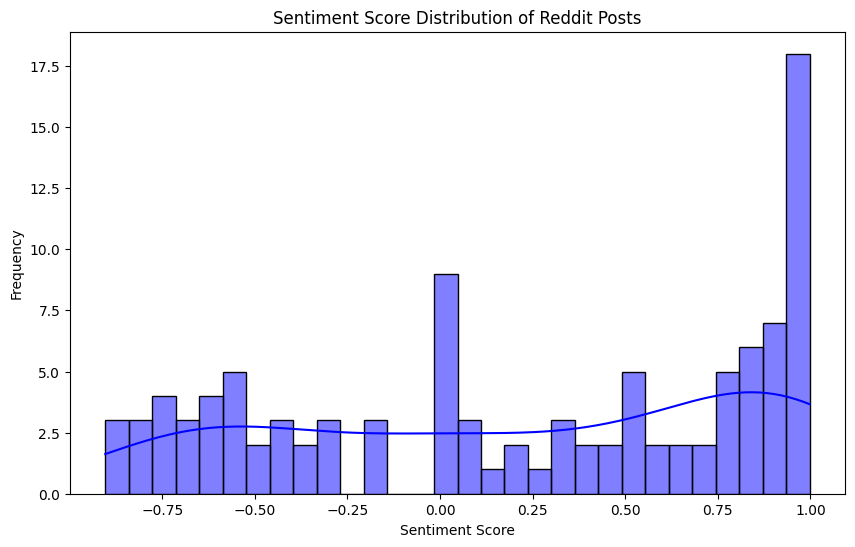

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment scores
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Score Distribution of Reddit Posts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


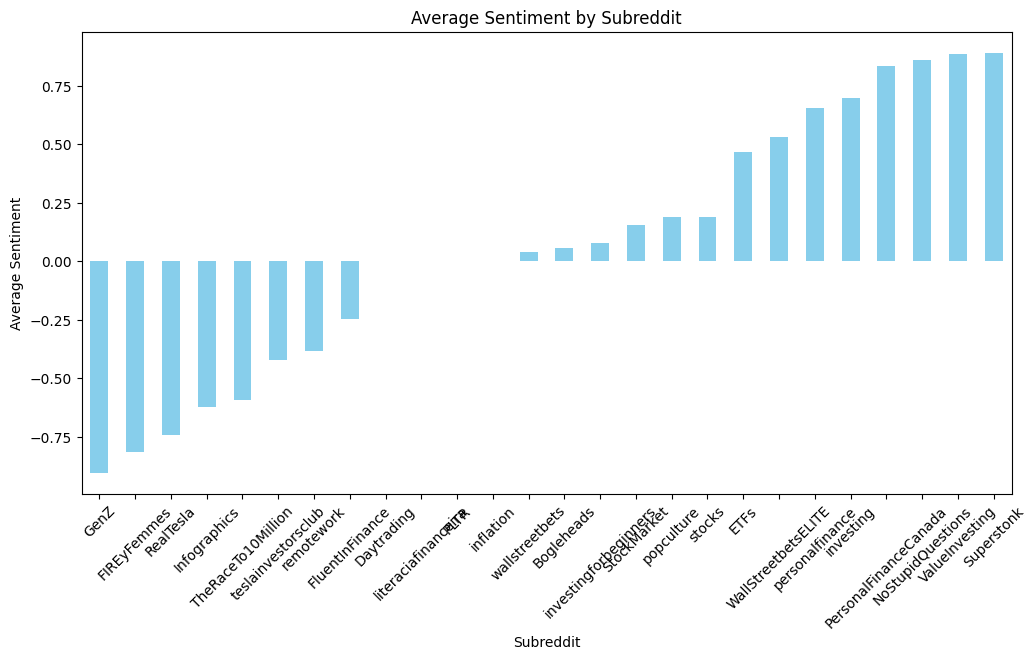

In [99]:
# Group by subreddit and calculate the average sentiment
subreddit_sentiment = df_cleaned.groupby('subreddit')['sentiment'].mean().sort_values()

# Plot the average sentiment by subreddit
plt.figure(figsize=(12,6))
subreddit_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.show()


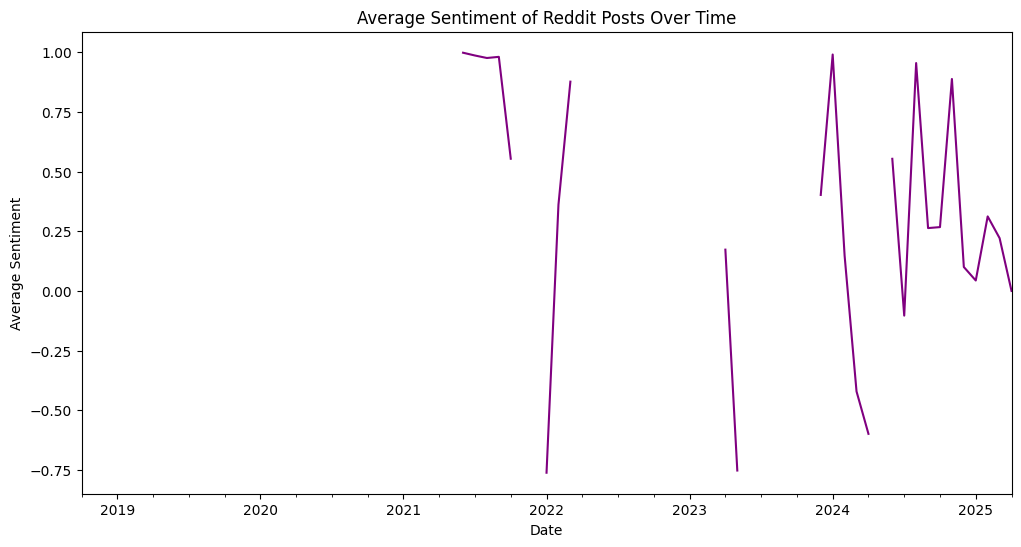

In [101]:
# Resample by month and calculate the average sentiment
monthly_sentiment = df_cleaned.resample('M', on='created_utc')['sentiment'].mean()

# Plot sentiment over time
plt.figure(figsize=(12,6))
monthly_sentiment.plot(color='purple')
plt.title('Average Sentiment of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


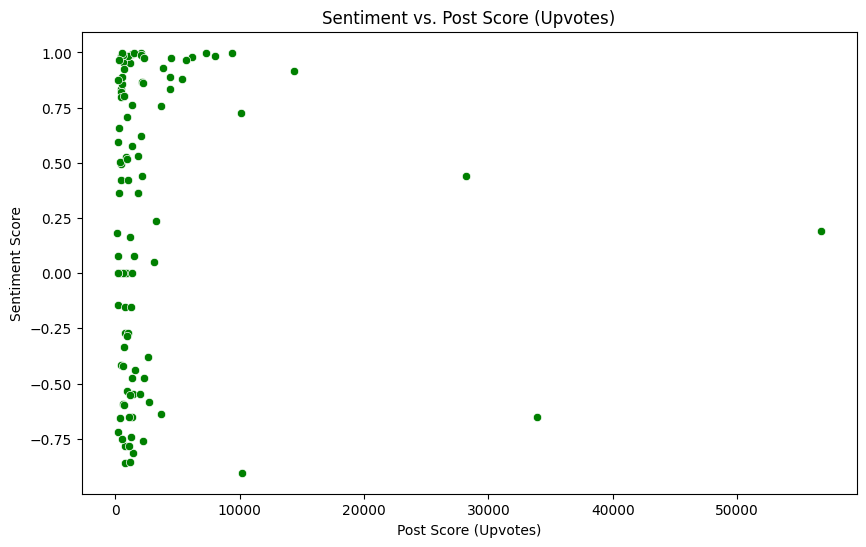

In [103]:
# Plot sentiment vs. score (upvotes)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='score', y='sentiment', color='green')
plt.title('Sentiment vs. Post Score (Upvotes)')
plt.xlabel('Post Score (Upvotes)')
plt.ylabel('Sentiment Score')
plt.show()

#bin bar chart/histogram, average number of upvotes in the bin

/tmp/ipykernel_40/4173220726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='sentiment_category', palette='Set1')


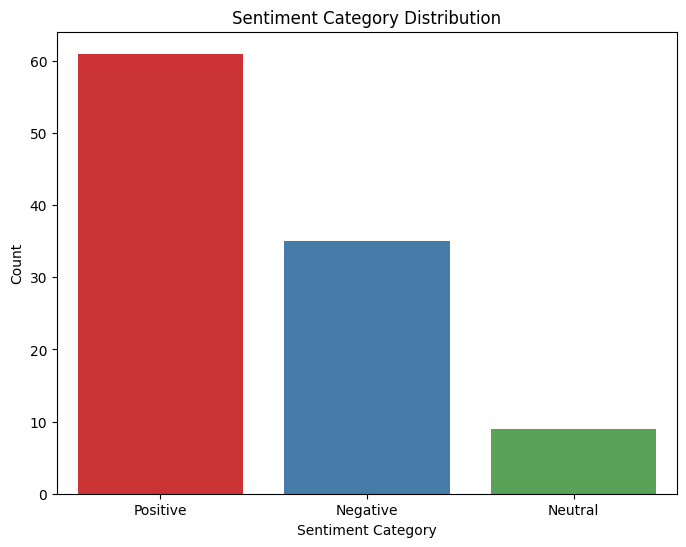

In [105]:
# Plot the sentiment category distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df_cleaned, x='sentiment_category', palette='Set1')
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


/tmp/ipykernel_40/2280842338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_posts, x='score', y='title', palette='Blues')
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


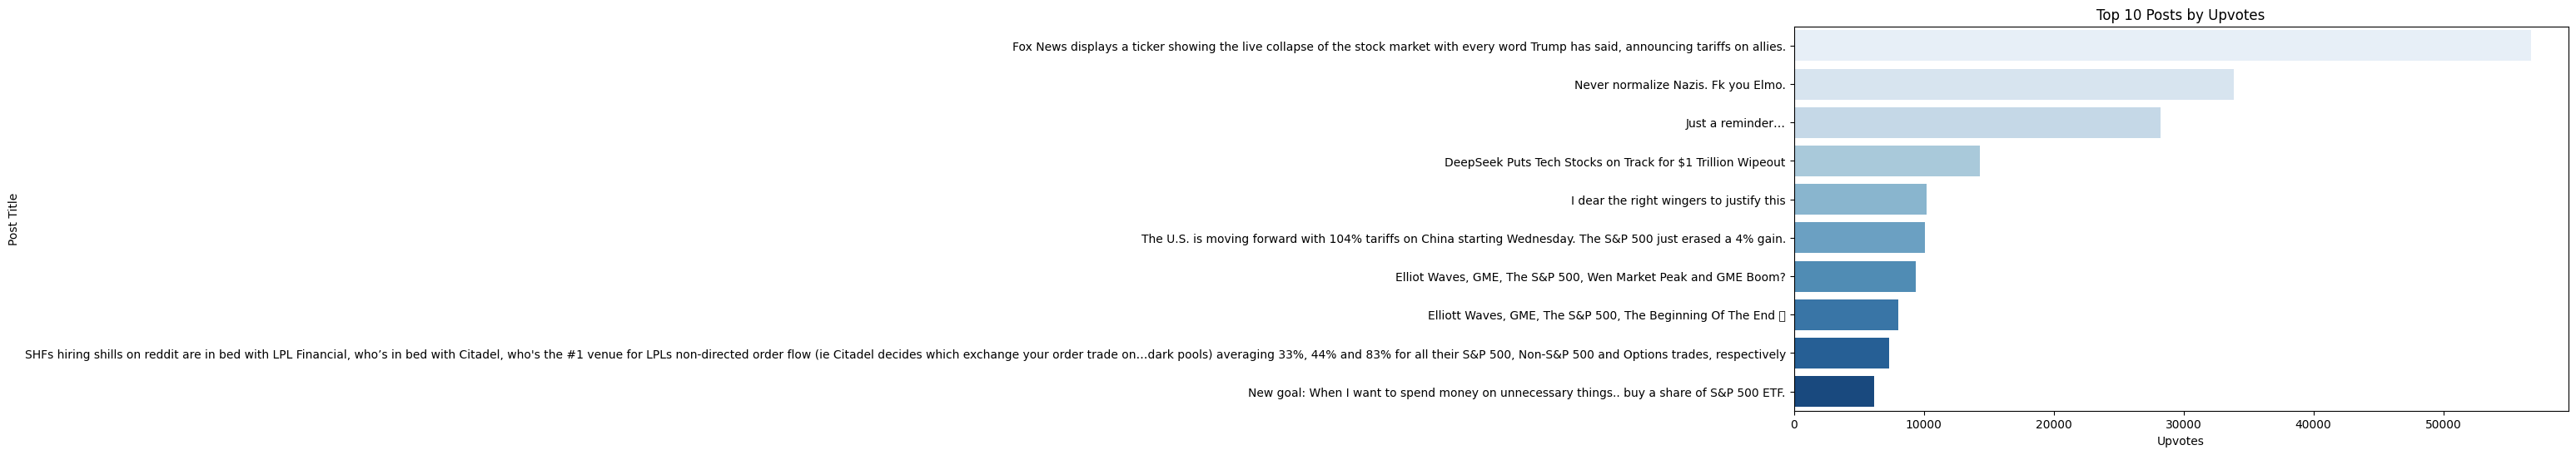

In [107]:
# Get the top 10 posts by score (upvotes)
top_posts = df_cleaned.nlargest(10, 'score')

# Plot top 10 posts by score
plt.figure(figsize=(12,6))
sns.barplot(data=top_posts, x='score', y='title', palette='Blues')
plt.title('Top 10 Posts by Upvotes')
plt.xlabel('Upvotes')
plt.ylabel('Post Title')
plt.show()
